In [1]:
import json
import copy
import numpy as np
from pycocotools import mask
from scipy.ndimage import morphology
import matplotlib.pyplot as plt
import random
import os

In [3]:
data=np.load("data/monuseg/test/w0_s0/TCGA-2Z-A9J9-01A-01-TS1_inst.npy")
len(np.unique(data))

576

/tmp/ipykernel_5195/1737599914.py:17: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  dilated_mask = morphology.binary_dilation(data != 0)


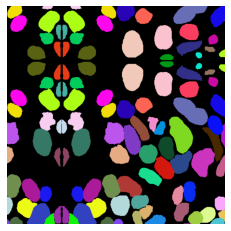

In [8]:
def display_color_mask(npy_path:str):
    if npy_path.endswith(".png"):
      data=np.array(Image.open(npy_path))
    elif npy_path.endswith(".npy"):
      data = np.load(npy_path)
    try:
        # 从.npy文件加载数据
        unique_values=np.unique(data)
        unique_values = unique_values[unique_values != 0] 
        
        # 创建颜色掩码
        color_mask = np.zeros(data.shape + (3,), dtype=np.uint8)
        for unique_value in unique_values:
          random_numbers = [random.randint(0, 256) for _ in range(3)]
          color_mask[data==unique_value]=random_numbers
        # color_mask[data != 0] = [255, 0, 0]  # 设置非零值的颜色，此处示例使用红色
        dilated_mask = morphology.binary_dilation(data != 0)
        # color_mask[dilated_mask] = [255, 255, 255]
        # 展示颜色掩码
        plt.imshow(color_mask)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"展示颜色掩码失败：{str(e)}")
display_color_mask("data/monuseg/train/w512_s256/TCGA-18-5592-01Z-00-DX1_0_inst.npy")

In [17]:
names=[name.split('.')[0] for name in sorted(os.listdir("data/monuseg/MoNuSeg/MoNuSegTestData/Tissue Images"))]
names  

['TCGA-2Z-A9J9-01A-01-TS1',
 'TCGA-44-2665-01B-06-BS6',
 'TCGA-69-7764-01A-01-TS1',
 'TCGA-A6-6782-01A-01-BS1',
 'TCGA-AC-A2FO-01A-01-TS1',
 'TCGA-AO-A0J2-01A-01-BSA',
 'TCGA-CU-A0YN-01A-02-BSB',
 'TCGA-EJ-A46H-01A-03-TSC',
 'TCGA-FG-A4MU-01B-01-TS1',
 'TCGA-GL-6846-01A-01-BS1',
 'TCGA-HC-7209-01A-01-TS1',
 'TCGA-HT-8564-01Z-00-DX1',
 'TCGA-IZ-8196-01A-01-BS1',
 'TCGA-ZF-A9R5-01A-01-TS1']

In [2]:
len(os.listdir("data/monuseg/train/w512_s256"))/4

297.0